In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense, MaxPool2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.utils import image_dataset_from_directory
import pathlib
from tensorflow.data import AUTOTUNE
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
caps_and_numbers = ['30', '31', '32', '33', '34', '35', '36',
                    '37', '38', '41', '42', '43', '44',
                    '45', '46', '47', '48', '49', '4A', '4B',
                    '4C', '4D', '4E', '50', '51', '52', '53',
                    '54', '55', '56', '57', '58', '59']

In [3]:
dir = "D:/Machine_Learning_Data/handwritten-characters/Train/"
img_size = 32
train_data = []
count = 0;
folder = 0;
for i in os.listdir(dir):
    if i in caps_and_numbers:
        folder+=1
        sub_directory = os.path.join(dir, i)
        for j in os.listdir(sub_directory):
            count+=1
            print(str(folder) + " : " + str(count), end='\r')
            #if count > 4000:
            #    break
            img = cv2.imread(os.path.join(sub_directory, j),0)
            img = cv2.resize(img, (img_size, img_size))
            train_data.append([img,i])   

In [4]:
len(train_data)

571446

In [5]:
val_dir = "D:/Machine_Learning_Data/handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    count = 0
    if i in caps_and_numbers:
        sub_directory = os.path.join(val_dir,i)
        for j in os.listdir(sub_directory):
            count+=1
            #if count > 1000:
            #    break
            img = cv2.imread(os.path.join(sub_directory,j),0)
            img = cv2.resize(img,(img_size,img_size))
            val_data.append([img,i]) 

In [6]:
len(val_data)

15044

In [7]:
random.shuffle(train_data)
random.shuffle(val_data)

In [8]:
train_X = []
train_Y = []
for features, label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [9]:
val_X = []
val_Y = []
for features, label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [10]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [11]:
from pickle import dump
dump(LB, open('C:/Users/tanne/Character_Identification_Model/LabelBinarizer/labelbinarizer59.pkl', 'wb'))

In [11]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1, img_size, img_size, 1)
train_Y = np.array(train_Y)

In [12]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1, img_size, img_size, 1)
val_Y = np.array(val_Y)

In [13]:
print(train_X.shape, val_X.shape)

(571446, 32, 32, 1) (15044, 32, 32, 1)


In [14]:
print(train_Y.shape, val_Y.shape)

(571446, 33) (15044, 33)


In [16]:

model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(img_size,img_size,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(34, activation='softmax'))

'''
model = Sequential([
# Layer 1
Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1), kernel_regularizer=l2(0.0005)),
# Layer 2
Conv2D(filters = 32, kernel_size = 5, strides = 1, use_bias=False),
# Layer 3
BatchNormalization(),
# — — — — — — — — — — — — — — — — #
Activation('relu'),
MaxPooling2D(pool_size = 2, strides = 2),
Dropout(0.25),
# — — — — — — — — — — — — — — — — #
# Layer 3
Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', kernel_regularizer=l2(0.0005)),
# Layer 4
Conv2D(filters = 64, kernel_size = 3, strides = 1, use_bias=False),
# Layer 5
BatchNormalization(),
# — — — — — — — — — — — — — — — — #
Activation('relu'),
MaxPooling2D(pool_size = 2, strides = 2),
Dropout(0.25),
Flatten(),
# — — — — — — — — — — — — — — — — #
# Layer 6
Dense(units = 256, use_bias=False),
# Layer 7
BatchNormalization(),
# — — — — — — — — — — — — — — — — #
Activation('relu'),
# — — — — — — — — — — — — — — — — #
# Layer 8
Dense(units = 128, use_bias=False),
# Layer 9
BatchNormalization(),
# — — — — — — — — — — — — — — — — #
Activation('relu'),
# — — — — — — — — — — — — — — — — #
# Layer 10
Dense(units = 84, use_bias=False),
# Layer 11
BatchNormalization(),
# — — — — — — — — — — — — — — — — #
Activation('relu'),
Dropout(0.25),
# — — — — — — — — — — — — — — — — #
# Output
Dense(units = 33, activation = 'softmax')
])
'''

"\n\nmodel = Sequential([\n# Layer 1\nConv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1), kernel_regularizer=l2(0.0005)),\n# Layer 2\nConv2D(filters = 32, kernel_size = 5, strides = 1, use_bias=False),\n# Layer 3\nBatchNormalization(),\n# — — — — — — — — — — — — — — — — #\nActivation('relu'),\nMaxPooling2D(pool_size = 2, strides = 2),\nDropout(0.25),\n# — — — — — — — — — — — — — — — — #\n# Layer 3\nConv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', kernel_regularizer=l2(0.0005)),\n# Layer 4\nConv2D(filters = 64, kernel_size = 3, strides = 1, use_bias=False),\n# Layer 5\nBatchNormalization(),\n# — — — — — — — — — — — — — — — — #\nActivation('relu'),\nMaxPooling2D(pool_size = 2, strides = 2),\nDropout(0.25),\nFlatten(),\n# — — — — — — — — — — — — — — — — #\n# Layer 6\nDense(units = 256, use_bias=False),\n# Layer 7\nBatchNormalization(),\n# — — — — — — — — — — — — — — — — #\nActivation('relu'),\n# — — — — — — — — — — — — — 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

In [18]:
#model_dirpathname = 'C:/Users/tanne/Character_Identification_Model/Model20' #put the path here
#model_dir = pathlib.Path(model_dirpathname)
#print(model_dir)
#model = load_model(model_dir)

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
epochs = 100
variable = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)
early_stop = EarlyStopping(monitor='loss', patience = 3)
history = model.fit(train_X, train_Y, epochs=epochs, validation_data = (val_X, val_Y), callbacks=[early_stop, variable])

In [20]:
epochs = 100
variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)
early_stop = EarlyStopping(monitor='loss', patience = 3)
history = model.fit(train_X, train_Y, epochs=epochs, validation_data = (val_X, val_Y), callbacks=[variable_learning_rate, early_stop])

Epoch 1/100
19055/19055 [==============================] - 460s 24ms/step - loss: 0.1926 - accuracy: 0.9412 - val_loss: 0.1198 - val_accuracy: 0.9582 - lr: 0.0010
Epoch 2/100
19055/19055 [==============================] - 458s 24ms/step - loss: 0.1252 - accuracy: 0.9608 - val_loss: 0.1074 - val_accuracy: 0.9640 - lr: 0.0010
Epoch 3/100
19055/19055 [==============================] - 460s 24ms/step - loss: 0.1089 - accuracy: 0.9652 - val_loss: 0.1067 - val_accuracy: 0.9617 - lr: 0.0010
Epoch 4/100
19055/19055 [==============================] - 455s 24ms/step - loss: 0.1008 - accuracy: 0.9674 - val_loss: 0.1051 - val_accuracy: 0.9620 - lr: 0.0010
Epoch 5/100
19055/19055 [==============================] - 454s 24ms/step - loss: 0.0966 - accuracy: 0.9685 - val_loss: 0.0942 - val_accuracy: 0.9666 - lr: 0.0010
Epoch 6/100
19055/19055 [==============================] - 457s 24ms/step - loss: 0.0933 - accuracy: 0.9695 - val_loss: 0.0936 - val_accuracy: 0.9668 - lr: 0.0010
Epoch 7/100
19055/1905

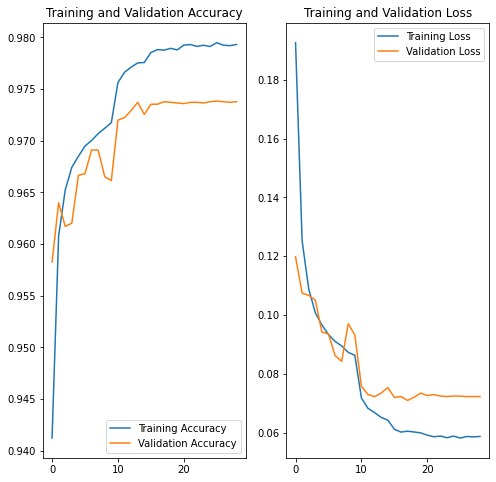

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(29)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
model_dirpathname = 'C://Users/tanne/Character_Identification_Model/Model59/'
model_dir = pathlib.Path(model_dirpathname)
print(model_dir)
model.save(model_dir)

C:\Users\tanne\Character_Identification_Model\Model59


INFO:tensorflow:Assets written to: C:\Users\tanne\Character_Identification_Model\Model59\assets


INFO:tensorflow:Assets written to: C:\Users\tanne\Character_Identification_Model\Model59\assets


In [24]:
def hex_to_char(hex_input):
    return(chr(int(hex_input[0], 16)))

In [25]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    
    return (cnts, boundingBoxes)

In [26]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (img_size, img_size), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,img_size,img_size,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        print(ypred)
        [x] = hex_to_char(ypred)
        letters.append(x)
    return letters, image

In [27]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 [==============================] - 0s 126ms/step
['42']
1/1 [==============================] - 0s 18ms/step
['45']
1/1 [==============================] - 0s 17ms/step
['4E']
1/1 [==============================] - 0s 17ms/step
['45']
1/1 [==============================] - 0s 18ms/step
['35']
BENE5


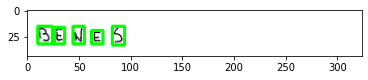

In [28]:
letter,image = get_letters("D:/Machine_Learning_Data/archive/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 17ms/step
['4C']
1/1 [==============================] - 0s 18ms/step
['49']
1/1 [==============================] - 0s 18ms/step
['4C']
1/1 [==============================] - 0s 17ms/step
['30']
1/1 [==============================] - 0s 19ms/step
['55']
LIL0U


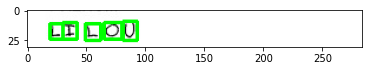

In [29]:
letter,image = get_letters("D:/Machine_Learning_Data/archive/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 19ms/step
['33']
1/1 [==============================] - 0s 18ms/step
['41']
1/1 [==============================] - 0s 18ms/step
['46']
1/1 [==============================] - 0s 18ms/step
['46']
1/1 [==============================] - 0s 18ms/step
['45']
1/1 [==============================] - 0s 18ms/step
['55']
1/1 [==============================] - 0s 17ms/step
['58']
3AFFEUX


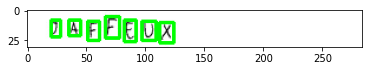

In [30]:
letter,image = get_letters("D:/Machine_Learning_Data/archive/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 19ms/step
['56']
1/1 [==============================] - 0s 18ms/step
['41']
1/1 [==============================] - 0s 18ms/step
['4C']
1/1 [==============================] - 0s 17ms/step
['45']
1/1 [==============================] - 0s 18ms/step
['4E']
1/1 [==============================] - 0s 18ms/step
['54']
1/1 [==============================] - 0s 18ms/step
['4A']
1/1 [==============================] - 0s 17ms/step
['4E']
1/1 [==============================] - 0s 18ms/step
['45']
VALENTJNE


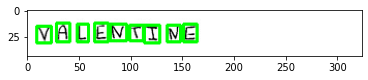

In [31]:
letter,image = get_letters("D:/Machine_Learning_Data/archive/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

In [29]:
model_dirpathname = 'C:/Users/tanne/Character_Identification_Model/variable_early_29epoch_moderate_Model57' #put the path here
model_dir = pathlib.Path(model_dirpathname)
print(model_dir)
model = load_model(model_dir)

results = model.evaluate(val_X, val_Y)
print(results)

C:\Users\tanne\Character_Identification_Model\variable_early_29epoch_moderate_Model57
471/471 [==============================] - 4s 9ms/step - loss: 0.0781 - accuracy: 0.9728
[0.07807566225528717, 0.972813069820404]


In [30]:
y_pred = model.predict(train_X)

17858/17858 [==============================] - 168s 9ms/step


In [31]:
c_m = confusion_matrix(LB.inverse_transform(train_Y), LB.inverse_transform(y_pred))
print(c_m)

[[65193     2     4 ...     0     0     0]
 [    0 42181     2 ...     0     0     0]
 [    4     4 39274 ...     0     1     0]
 ...
 [    0     2     1 ...  7212     0     1]
 [    0     0     0 ...     0  5074    14]
 [    1     1     0 ...     0    17  6364]]


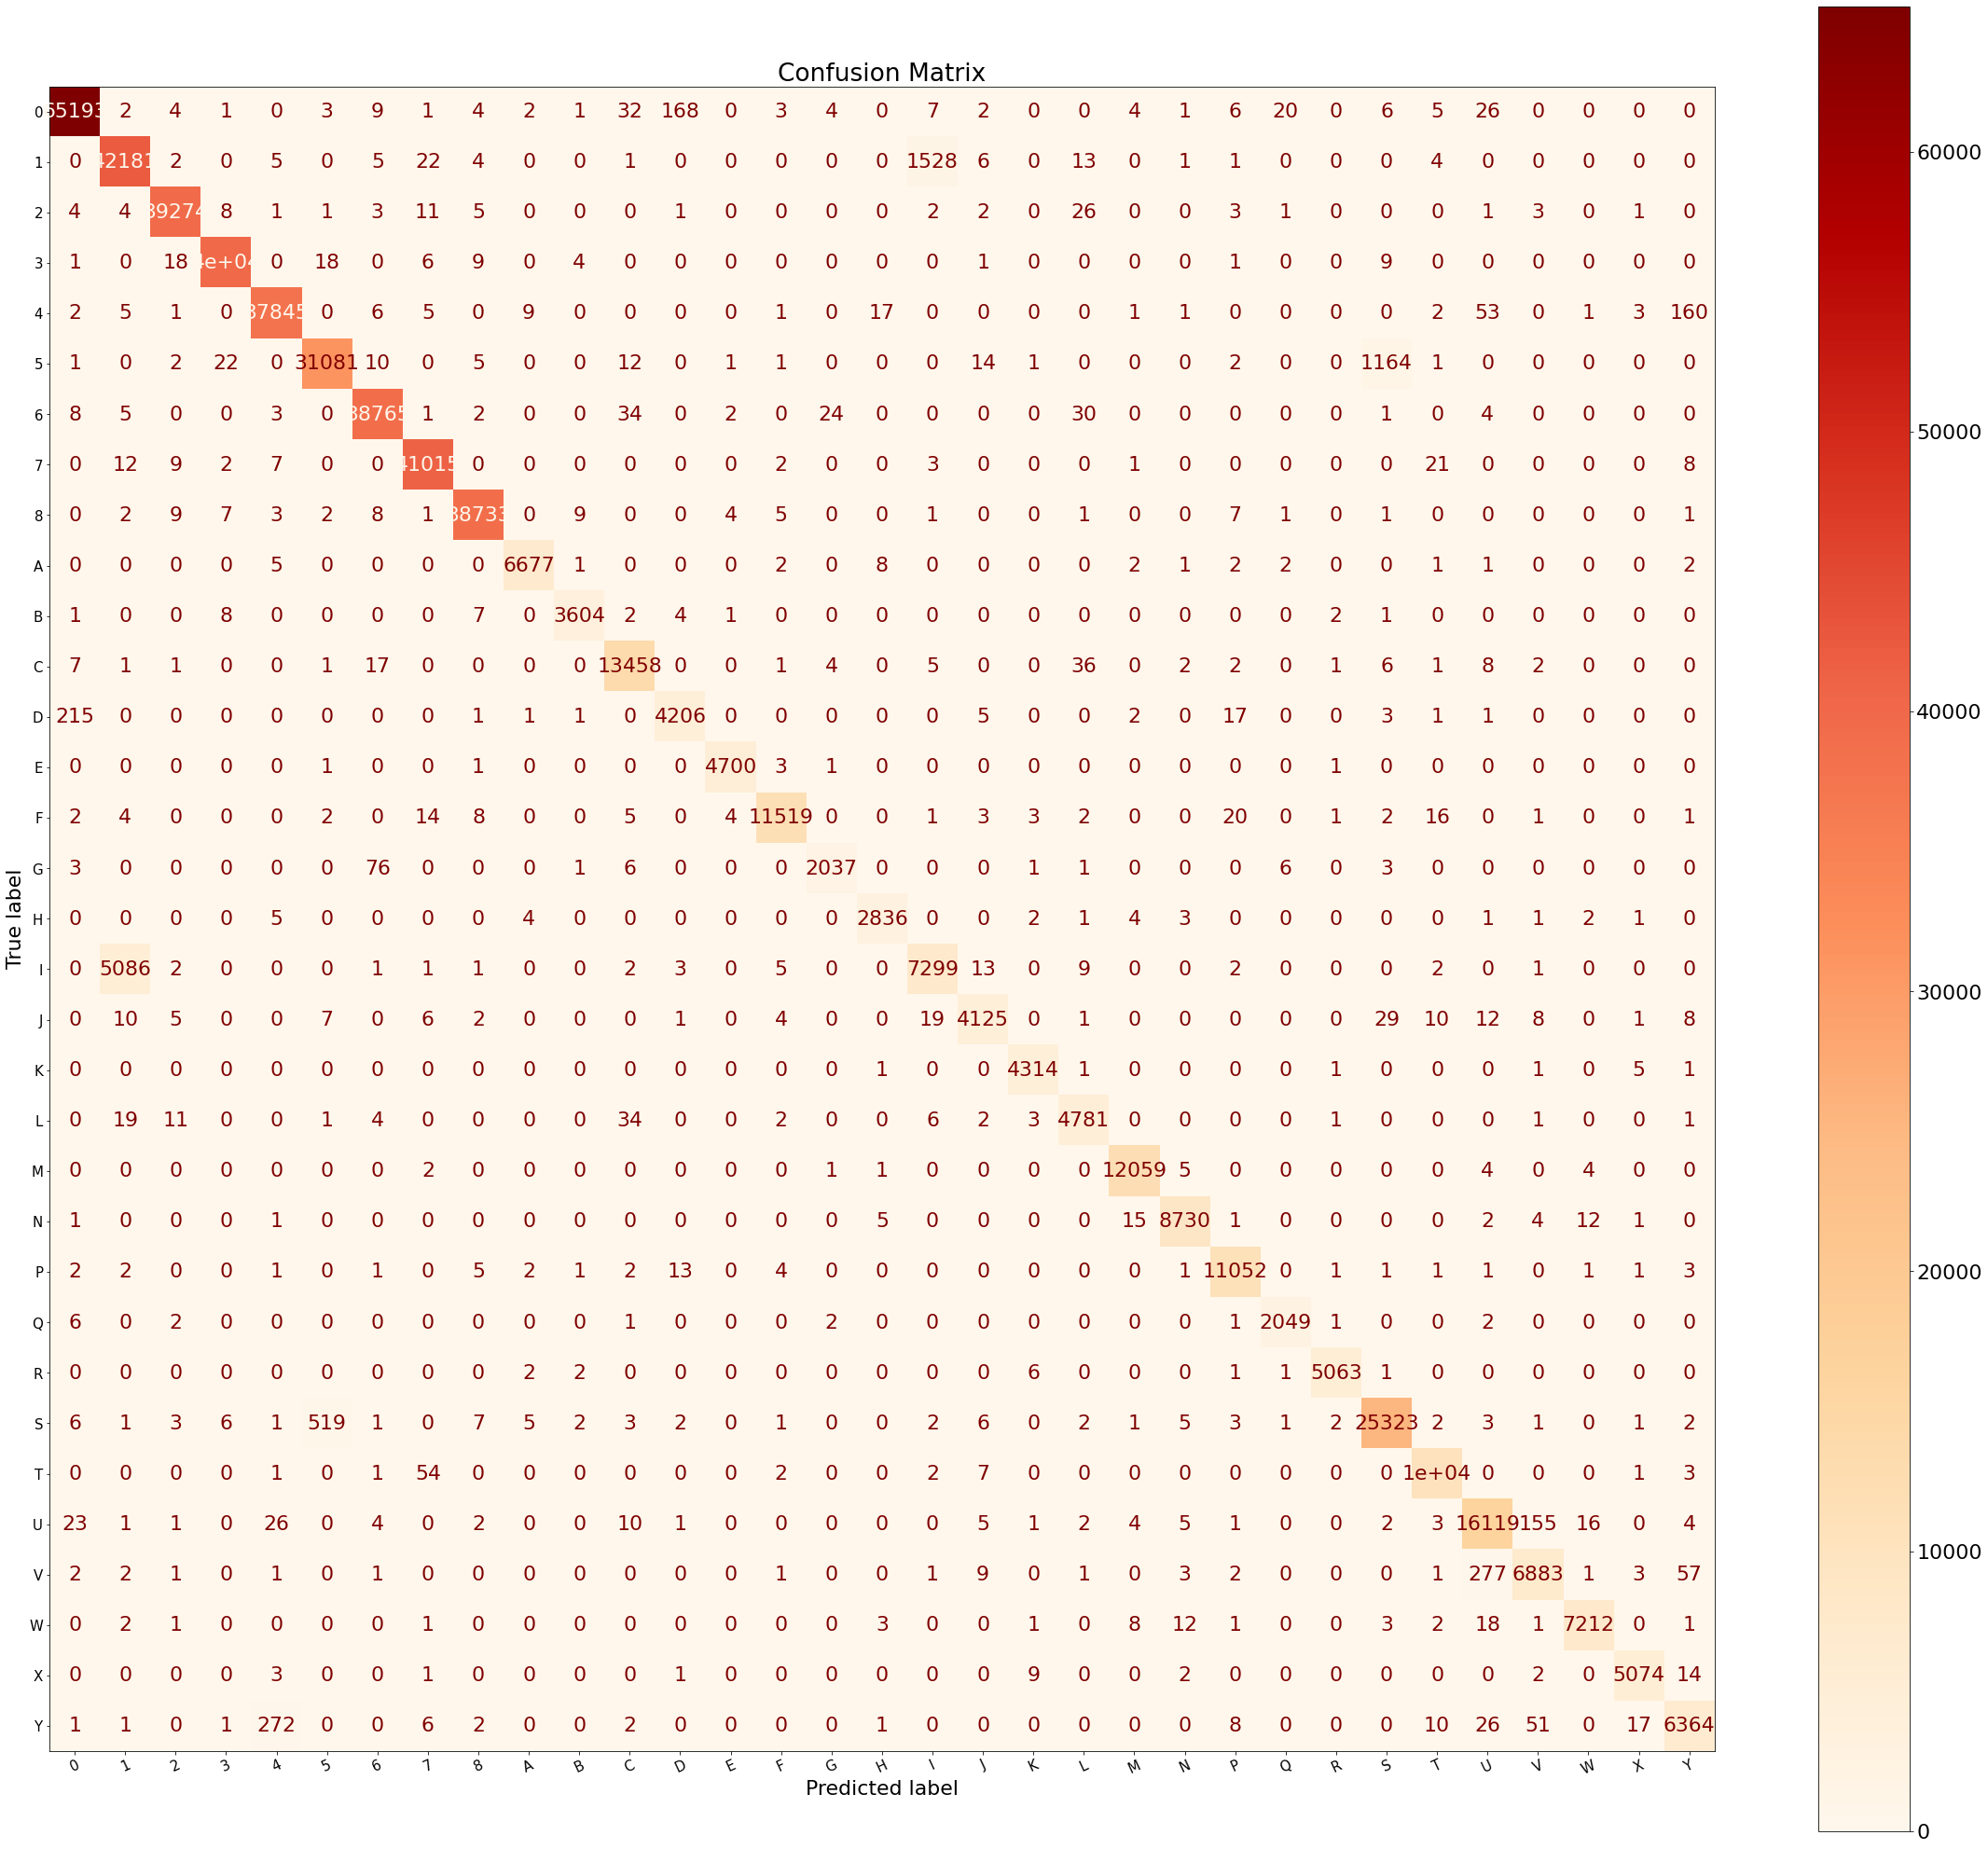

In [32]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
%matplotlib inline
plt.rcParams['figure.figsize'] = (40.0, 36.0)
plt.rcParams['font.size'] = 22
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)

display_c_m.plot(cmap='OrRd', xticks_rotation=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Confusion Matrix')

plt.show()